In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "simple_white"

%cd ..
from models.cconv import CConvModel
from datasets.density_data_module import DensityDataModule
from utils.train_helper import load_hparams

/home/jakob/Bachelorarbeit/GNNDensityGradients
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

# Default network 32k
checkpoint  = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/anova/default1/checkpoints/epoch=19-step=33000.ckpt"
params_path = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/anova/default1/checkpoints/params.json"

# Best bayes network 32k
# checkpoint  = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/bayes/best_bayes/checkpoints/epoch=31-step=32000.ckpt"
# params_path = "/home/jakob/ray_results4/LightningTrainer_2023-08-07_20-52-58/0e385726_32/params.json"

model = CConvModel.load_from_checkpoint(
    checkpoint_path = checkpoint,
    hparams         = load_hparams(params_path),
    device          = 'cuda'
)

model.eval()

density_data = DensityDataModule(
    data_dir    = 'datasets/data/dam_break_preprocessed/train',
    batch_size  = 1,
    data_split  = (1., 0., 0.),
    num_workers = 0, # Note that cuda only allows 0 workers.
    shuffle     = False,
    cache       = False,       # Load dataset into memory
    device      = 'cuda',
)
density_data.setup("Initialize")
train_loader = density_data.train_dataloader()
train_iter = iter(train_loader)
index = 0

Setting up data module for stage  Initialize
Dataset is already preprepared. Not applying transform_once. (This means density & grads aren't recalculated.)


/home/jakob/anaconda3/envs/CConv/lib/python3.10/site-packages/torch/utils/data/dataset.py:342: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "
/home/jakob/anaconda3/envs/CConv/lib/python3.10/site-packages/torch/utils/data/dataset.py:342: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "


In [12]:
density_data.dataset['train'][0]

{'pos': tensor([[ 2.3279e-12,  9.0909e-03,  8.7795e-03],
         [ 4.8687e-02,  9.0909e-03,  4.9584e-02],
         [-2.1159e-10,  9.0909e-03,  5.2883e-02],
         ...,
         [ 1.3973e+00,  6.4136e-02,  4.1997e-01],
         [ 1.0302e+00,  1.3986e-01,  4.0916e-01],
         [ 1.0491e+00,  1.9035e-01,  4.3833e-01]], device='cuda:0'),
 'vel': tensor([[-1.2560e-08,  0.0000e+00,  7.4869e-03],
         [-2.3756e-02,  0.0000e+00,  4.7542e-03],
         [-1.2531e-08,  0.0000e+00, -4.7998e-02],
         ...,
         [ 1.0270e-01, -4.1071e-01,  2.0851e-01],
         [-9.0150e-01, -2.0094e-02,  2.5615e-01],
         [-9.4760e-01, -1.1826e-01,  1.1752e-01]], device='cuda:0'),
 'm': tensor([[0.1309],
         [0.1309],
         [0.1309],
         ...,
         [0.1309],
         [0.1309],
         [0.1309]], device='cuda:0'),
 'viscosity': tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 'box': tensor([[1.4545e+00, 9.4

In [75]:
# to visualize the kernel, we need generate linspaced data
elem = next(train_iter)[0]
print("elem is element number", index)
index += 1

elem is element number 3


In [4]:
int('0')

0

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.train_helper import *
prepocess_dataset_files('datasets/data/sequential', device='cuda')

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [03:38<00:00,  8.41s/it]


In [3]:
from utils.visualization import *
from datasets.density_dataset import SimulationDataset
from glob import glob
import os

data_dir = 'datasets/data/sequential'

dataset = SimulationDataset(
    files          = glob(os.path.join(data_dir, '*.zst')),
    transform      = None,
    transform_once = None,
    cache          = False,
    device         = 'cuda'
)


Dataset is already preprepared. Not applying transform_once. (This means density & grads aren't recalculated.)


In [11]:
dataset.filemap

[(0, 0, 0, 0, '0_00.msgpack.zst', array(0., dtype=float32), -1),
 (1, 1, 0, 0, '0_00.msgpack.zst', array(1., dtype=float32), -1),
 (2, 2, 0, 0, '0_00.msgpack.zst', array(2., dtype=float32), -1),
 (3, 3, 0, 0, '0_00.msgpack.zst', array(3., dtype=float32), -1),
 (4, 4, 0, 0, '0_00.msgpack.zst', array(4., dtype=float32), -1),
 (5, 5, 0, 0, '0_00.msgpack.zst', array(5., dtype=float32), -1),
 (6, 6, 0, 0, '0_00.msgpack.zst', array(6., dtype=float32), -1),
 (7, 7, 0, 0, '0_00.msgpack.zst', array(7., dtype=float32), -1),
 (8, 8, 0, 0, '0_00.msgpack.zst', array(8., dtype=float32), -1),
 (9, 9, 0, 0, '0_00.msgpack.zst', array(9., dtype=float32), -1),
 (10, 10, 0, 0, '0_00.msgpack.zst', array(10., dtype=float32), -1),
 (11, 11, 0, 0, '0_00.msgpack.zst', array(11., dtype=float32), -1),
 (12, 12, 0, 0, '0_00.msgpack.zst', array(12., dtype=float32), -1),
 (13, 13, 0, 0, '0_00.msgpack.zst', array(13., dtype=float32), -1),
 (14, 14, 0, 0, '0_00.msgpack.zst', array(14., dtype=float32), -1),
 (15, 15, 

In [111]:
[i for i in range(100, 151, 10)]

[100, 110, 120, 130, 140, 150]

In [6]:
import os.path
import pickle
import zstandard as zstd
import msgpack
import msgpack_numpy
msgpack_numpy.patch()

decompressor = zstd.ZstdDecompressor()
with open("datasets/data/sequential/0_00.msgpack.zst", 'rb') as f:
    content = msgpack.unpackb(decompressor.decompress(f.read()), raw=False)

In [7]:
content[0].keys()

dict_keys(['pos', 'vel', 'm', 'viscosity', 'box', 'box_normals', 'frame_id', 'density', 'temporal_density_gradient'])

In [110]:
for i in range(100, 151, 10):
    elem = dataset[i]
    fig = plot_particles(elem['pos'], elem['density'], colorscale='Plasma', return_fig=True)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))
    fig.show()

100

In [89]:
# Build graph with error on y and timestep on x
# Joy graph would be optimal as it shows the progressing of error
# graph one is error over time



In [4]:
import torch.nn.functional as F

def get_loss(model_out, sample):
    return F.mse_loss(model_out, sample['temporal_density_gradient']).item()


scene = [dataset[i] for i in range(0, 500)]

In [131]:
scene[0]['pos'].shape[0]

3456

In [14]:
frame_id = [s['frame_id'].item() for s in scene]
# px.scatter(frame_id)
px.scatter(frame_id)
# 0
# 151
# 302

In [5]:
# Default network 32k
checkpoint  = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/anova/default1/checkpoints/epoch=19-step=33000.ckpt"
params_path = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/anova/default1/checkpoints/params.json"

# Best bayes network 32k
# checkpoint  = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/bayes/best_bayes/checkpoints/epoch=31-step=32000.ckpt"
# params_path = "/home/jakob/ray_results4/LightningTrainer_2023-08-07_20-52-58/0e385726_32/params.json"

model = CConvModel.load_from_checkpoint(
    checkpoint_path = checkpoint,
    hparams         = load_hparams(params_path),
    device          = 'cuda'
)

model_out1 = [model(x) for x in scene]
losses1 = [get_loss(model_out, sample) for model_out, sample in zip(model_out1, scene)]
px.line(losses1, title = "Default model losses", labels = {"x": "Time step", "y": "Loss"})

In [121]:
df

frame   Default     Bayes
0      0.0  0.009064  0.004072
1      1.0  0.013237  0.004628
2      2.0  0.013670  0.004603
3      3.0  0.015709  0.010558
4      4.0  0.012685  0.009329
..     ...       ...       ...
495  495.0  0.056389  0.054472
496  496.0  0.070716  0.071523
497  497.0  0.050289  0.049349
498  498.0  0.048760  0.054071
499  499.0  0.051232  0.049656

[500 rows x 3 columns]

In [122]:

frame = [i for i in range(len(losses2))]
data = [frame, losses1, losses2]
df = pd.DataFrame(data, index = ["frame", "Default", "Bayes"]).T
px.line(df, x = "frame", y = df.columns[1:], title = "Losses of both models", labels = {"frame": "Frame", "value": "Loss", "variable": "Model"})


In [16]:
df[0:151]

frame   Default     Bayes
0      0.0  0.009064  0.004072
1      1.0  0.013237  0.004628
2      2.0  0.013670  0.004603
3      3.0  0.015709  0.010558
4      4.0  0.012685  0.009329
..     ...       ...       ...
146  146.0  0.080113  0.079794
147  147.0  0.074446  0.081760
148  148.0  0.066618  0.073265
149  149.0  0.070169  0.073830
150  150.0  0.076679  0.088362

[151 rows x 3 columns]

In [6]:
# Best bayes network 32k
checkpoint  = "/home/jakob/Bachelorarbeit/GNNDensityGradients/lightning_logs/bayes/best_bayes/checkpoints/epoch=31-step=32000.ckpt"
params_path = "/home/jakob/ray_results4/LightningTrainer_2023-08-07_20-52-58/0e385726_32/params.json"

model_bayes = CConvModel.load_from_checkpoint(
    checkpoint_path = checkpoint,
    hparams         = load_hparams(params_path),
    device          = 'cuda'
)

model_out2 = [model_bayes(x) for x in scene]
losses2 = [get_loss(model_out, sample) for model_out, sample in zip(model_out2, scene)]
px.line(losses2, title = "Bayes model losses", labels = {"x": "Time step", "y": "Loss"})



In [7]:
frame = [i for i in range(0, 152)] + [i for i in range(0, 151)] + [i for i in range(0, 151)] + [i for i in range(0, 46)]
data = [frame, losses1, losses2]
df = pd.DataFrame(data, index = ["frame", "Baseline", "Alternative"]).T


In [123]:

df.loc[152:302, "frame"] = [i for i in range(152, 303)]

/tmp/ipykernel_1938/4097606455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
fig1 = px.line(df[0:151], x = "frame", y = df.columns[1:], labels = {"frame": "Frame", "value": "Loss", "variable": "Model"})
fig2 = px.line(df[152:302], x = "frame", y = df.columns[1:], labels = {"frame": "Frame", "value": "Loss", "variable": "Model"})
fig3 = px.line(df[303:453], x = "frame", y = df.columns[1:], labels = {"frame": "Frame", "value": "Loss", "variable": "Model"})

for i, fig in enumerate([fig1, fig2, fig3]):
    # fig.update_layout(legend_title_text='Δv', xaxis_title='x', yaxis_title='Δρ/Δt')
    fig.update_layout(margin=dict(l=20, r=20, t=0, b=0), font = dict(family = "serif", size = 24))
    fig.update_layout(width=1000, height = 400)
    fig.update_traces(line=dict(width=2.5))
    fig.show()

    
    dir = "/home/jakob/Bachelorarbeit/GNNDensityGradientsThesis/figures/"
    fig.write_image(dir + "generalization_" + str(i) + ".pdf", width=1000, height=400, scale=4)
    fig.write_image(dir + "generalization_" + str(i) + ".pdf", width=1000, height=400, scale=4)



In [ ]:
# TODO: PLOT SIMULATION 6 FRAMES, DAMIT MAN WEISS, WAS HIER ÜBERHAUPT DAS NETZ SIEHT

In [12]:
# store error1: all deltas from target density grad and predicted density grad
# store error2 analogous
# put together in dataframe
# print joyplot
error1 = [model(s) - s['temporal_density_gradient'] for s in scene]
error2 = [model_bayes(s) - s['temporal_density_gradient'] for s in scene]

In [26]:
fig.savefig(dir + "error_distribution_baseline.pdf", bbox_inches='tight', pad_inches=0)

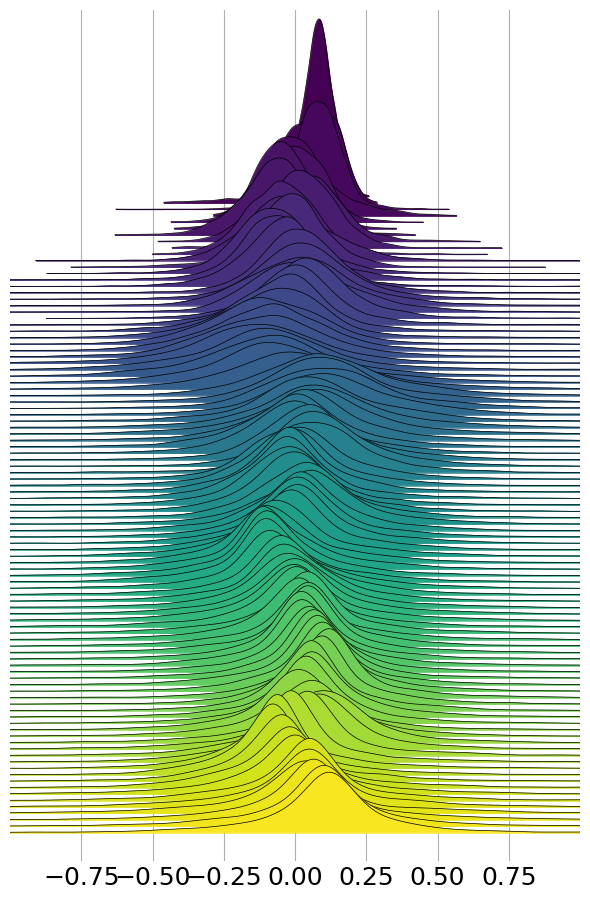

In [25]:
%matplotlib inline

import joypy
from matplotlib import cm
error1_np = np.array([error1[i].cpu().detach().numpy() for i in range(len(error1))])
error_data = pd.DataFrame(np.array(error1_np[0:100]).reshape(100, -1)).T

labels = [i if i % 20 == 0 else None for i in range(100)]

fig, axes = joypy.joyplot(
    error_data,
      linewidth   = 0.5,
      figsize     = (6, 9),
      legend      = False,
      x_range     = [-1.0, 1.0],
      colormap    = cm.viridis,
      fade        = False,
      tails       = 0.000005,
      overlap     = 3,
      labels      = labels,
      ylabels     = False,
      grid        = 'both',
      range_style = 'own'
)

# set labels s.t. only every 20th label is shown
for i, ax in enumerate(axes):
    if i % 20 != 0:
        ax.set_xlabel('')

    ax.set_ylabel('')

# set font to serif, size 24
for ax in axes:
    ax.set_title(ax.get_title(), fontdict={'family': 'serif', 'size': 18})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'family': 'serif', 'size': 18})
    ax.set_ylabel(ax.get_ylabel(), fontdict={'family': 'serif', 'size': 18})
    ax.tick_params(axis='both', which='major', labelsize=18)

# save as pdf
dir = "/home/jakob/Bachelorarbeit/GNNDensityGradientsThesis/figures/"
fig.savefig(dir + "error_distribution_baseline.pdf", bbox_inches='tight', pad_inches=0)


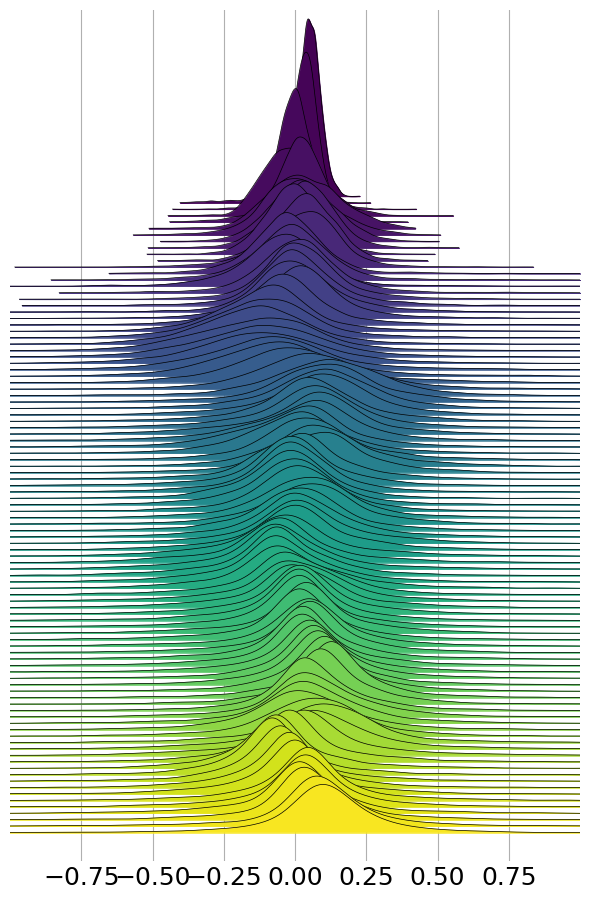

In [27]:
error2_np = np.array([error2[i].cpu().detach().numpy() for i in range(len(error2))])
error_data = pd.DataFrame(np.array(error2_np[0:100]).reshape(100, -1)).T

labels = [i if i % 20 == 0 else None for i in range(100)]

fig, axes = joypy.joyplot(
    error_data,
      linewidth   = 0.5,
      figsize     = (6, 9),
      legend      = False,
      x_range     = [-1.0, 1.0],
      colormap    = cm.viridis,
      fade        = False,
      tails       = 0.000005,
      overlap     = 3,
      labels      = labels,
      ylabels     = False,
      grid        = 'both',
      range_style = 'own'
)

for ax in axes:
    ax.set_title(ax.get_title(), fontdict={'family': 'serif', 'size': 18})
    ax.set_xlabel(ax.get_xlabel(), fontdict={'family': 'serif', 'size': 18})
    ax.set_ylabel(ax.get_ylabel(), fontdict={'family': 'serif', 'size': 18})
    ax.tick_params(axis='both', which='major', labelsize=18)

# save as pdf
dir = "/home/jakob/Bachelorarbeit/GNNDensityGradientsThesis/figures/"
fig.savefig(dir + "error_distribution_alternative.pdf", bbox_inches='tight', pad_inches=0)

In [108]:
axes[4].xaxis.get_label()

Text(0.5, 0, '')

In [28]:
import joypy
joypy.joyplot(error1)

ValueError: No numeric values found. Joyplot requires at least a numeric column/group.

(<Figure size 640x480 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

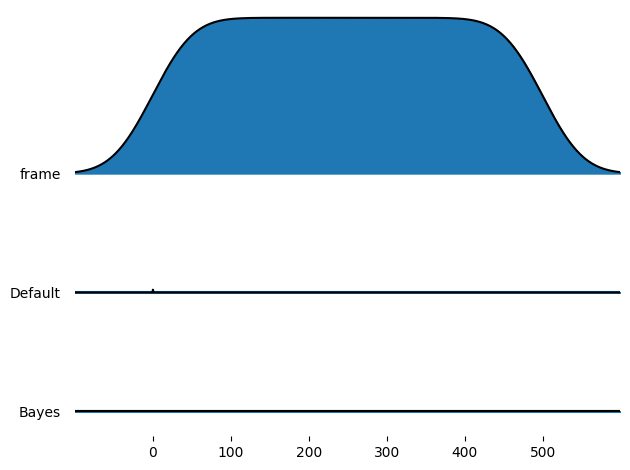

In [81]:
import joypy
joypy.joyplot(df, labels=[1,2,3])